In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
dict={
    "Area":[2600,3000,3200,3600,4000],
    "Price":[550000,565000,610000,680000,725000]
}

In [3]:
df = pd.DataFrame(dict)

In [4]:
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [5]:
df.to_csv('homeprice.csv')

In [7]:
df.Area

0    2600
1    3000
2    3200
3    3600
4    4000
Name: Area, dtype: int64

In [6]:
df.Price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [ ]:
df.head(2)

,Area,Price
0,2600,550000
1,3000,565000


In [20]:
df.describe()

,Area,Price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


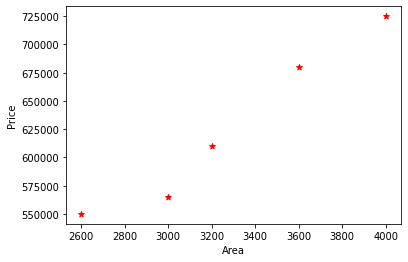

In [24]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price,color='red',marker='*') #Can give marker as +,-,* ||| Not ant symbol **, &

In [26]:
new_df = df.drop('Price',axis=1)
new_df
#Created 2D array

,Area
0,2600
1,3000
2,3200
3,3600
4,4000


In [27]:
Area = df.Area
Area
#1 D array

0    2600
1    3000
2    3200
3    3600
4    4000
Name: Area, dtype: int64

In [28]:
Price = df.Price
Price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: Price, dtype: int64

In [29]:
# Create linear regression object  
reg = linear_model.LinearRegression()   # new_df here is 2D array and price 1D & both can't be 1D
reg.fit(new_df, Price)                  # Can't use df.Area here

LinearRegression()

In [30]:
reg.predict([[3300]])                   #Predict price of a home with area = 3300 sqr ft

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [32]:
reg.coef_                               # valueof coff =m

array([135.78767123])

In [33]:
reg.intercept_                          # Intercept of y axis =b

180616.43835616432

In [34]:
3300*135.78767123 +180616.43835616432   # Y = m *X + b (m is coefficient and b is intercept X is area and Y is price)

628715.7534151643

In [35]:
reg.predict([[5000]])                   # Predict price of a home with area = 5000 sqr ft 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([859554.79452055])

In [37]:
# Generate CSV file with list of home price predictions 

In [38]:
area_df = pd.DataFrame(df.Area)
area_df.to_csv("areas.csv")
area_df.head(3)

,Area
0,2600
1,3000
2,3200


In [39]:
p = reg.predict(area_df)
p

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

In [40]:
area_df['predicted rices']=p
area_df

,Area,predicted rices
0,2600,533664.383562
1,3000,587979.452055
2,3200,615136.986301
3,3600,669452.054795
4,4000,723767.123288


In [41]:
area_df.to_csv("prediction.csv")